In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read datasets
all_ages = pd.read_csv('data/all-ages.csv')
grad_students = pd.read_csv('data/grad-students.csv')
majors_list = pd.read_csv('data/majors-list.csv')
recent_grads = pd.read_csv('data/recent-grads.csv')
women_stem = pd.read_csv('data/women-stem.csv')

# Question: Is there a relationship between unemployment rate and median income?

In [7]:
all_ages.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


R-Value = -0.30194565958171116


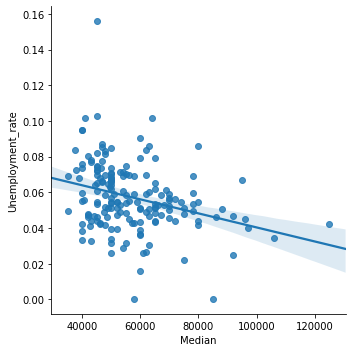

In [43]:
# linregress plot, not too indicative
sns.lmplot(data=all_ages, x='Median', y='Unemployment_rate')
rval = linregress(all_ages['Median'], all_ages['Unemployment_rate']).rvalue
print('R-Value = ' + str(rval))

## Idea: Bin Unemployment Rate
Perhaps if we bin unemployment rate into 6 bins and aggregate the incomes within those bins, we can see a more progressive bar chart that displays some sort of relationship.

In [45]:
# bin columns to see if interesting
ur_med = all_ages.copy()[['Unemployment_rate', 'Median']]

Text(0.5, 1.0, 'Unemployment Rate Histogram')

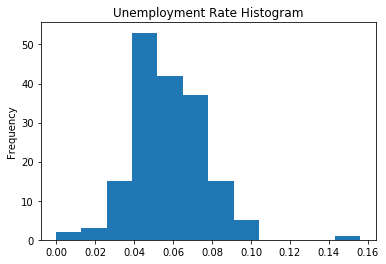

In [46]:
ur_med.Unemployment_rate.plot.hist(bins=12).set_title('Unemployment Rate Histogram')

Text(0.5, 1.0, 'Median Income Histogram')

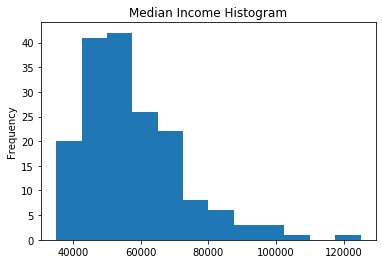

In [47]:
ur_med.Median.plot.hist(bins=12).set_title('Median Income Histogram')

In [48]:
# categorizing UR and median as new columns
def categorize(val):
    '''
    Categorizes the bins as 1, 2, 3, 4, 5, 6 from low to high:
    '''
    if 1 <= val <= 2:
        return 1
    if 3 <= val <= 4:
        return 2
    if 5 <= val <= 6:
        return 3
    if 7 <= val <= 8:
        return 4
    if 9 <= val <= 10:
        return 5
    return 6

ur_med['Unemployment_rate'] = pd.qcut(ur_med['Unemployment_rate'], 12, labels = np.arange(1, 13)).apply(categorize)
ur_med.head()

,Unemployment_rate,Median
0,1,50000
1,1,54000
2,1,63000
3,2,46000
4,3,62000


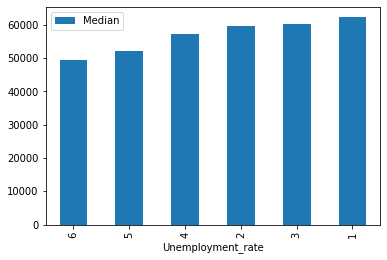

In [49]:
grps = ur_med.groupby('Unemployment_rate').mean()
grps.sort_values(by='Median').plot.bar()

# Findings
It appears that there is a negative correlation between unemployment rate and median income. The more a major makes, the less likely people that have that major are unemployed.